In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('C:/Deloitte Folder/ML/Clustering/Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
x=data.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing  import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
data = ct.fit_transform(data)
data


array([[  0.,   1.,   1.,  19.,  15.,  39.],
       [  0.,   1.,   2.,  21.,  15.,  81.],
       [  1.,   0.,   3.,  20.,  16.,   6.],
       ...,
       [  0.,   1., 198.,  32., 126.,  74.],
       [  0.,   1., 199.,  32., 137.,  18.],
       [  0.,   1., 200.,  30., 137.,  83.]])

In [13]:
from sklearn.cluster import KMeans
WSS=[]
for clusters in range(2,20):
    kmeans=KMeans(n_clusters=clusters)
    kmeans.fit(x)
    WSS.append(kmeans.inertia_)
WSS

[181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30241.34361793659,
 25018.576334776328,
 21850.16528258562,
 19643.655552199743,
 18022.705259663515,
 15801.686992795065,
 14745.04317962739,
 13359.341163990082,
 12112.058602671834,
 11109.849279609274,
 10206.861768786766,
 9272.523132664433,
 8598.540348781653]

In [14]:
el_method = pd.DataFrame({'cluster':range(2,20),'WSS':WSS})

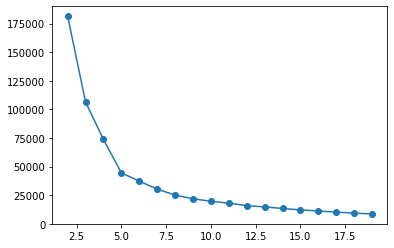

In [15]:
plt.plot(el_method['cluster'],el_method['WSS'],marker='o')

In [31]:
from sklearn.metrics import silhouette_score
silhouette_avg=[]
for cluster in range(2,20):
    kmeans=KMeans(n_clusters=cluster)
    kmeans.fit(x)
    cluster_labels=kmeans.labels_
    silhouette_avg.append(silhouette_score(x,cluster_labels))

Text(0, 0.5, 'Silhouette Score')

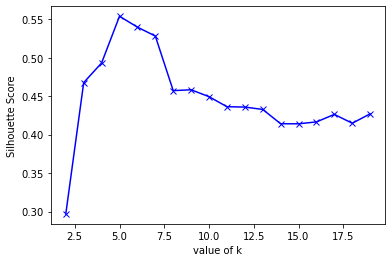

In [32]:
plt.plot(range(2,20),silhouette_avg,'bx-')
plt.xlabel('value of k')
plt.ylabel('Silhouette Score')

In [16]:
kmeans=KMeans(n_clusters=5,random_state=42)
kmeans.fit(x)

KMeans(n_clusters=5, random_state=42)

In [17]:
kmeans.inertia_

44448.45544793369

In [18]:
y_kmeans=kmeans.predict(x)

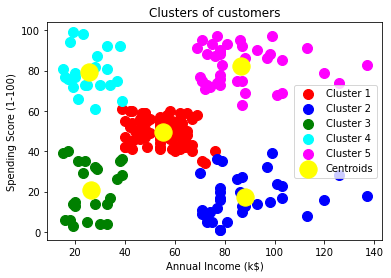

In [19]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
